## 30910_안윤지_0923_1

In [1]:
import pandas as pd
import numpy as np

In [2]:
exam = pd.read_csv('exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [3]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
# 2,7,14 행 수학 NaN 할당

exam.loc[[2,7,14],['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [5]:
# math의 평균
exam['math'].mean()

55.23529411764706

In [7]:
# 평균을 NaN에 값으로 대체

exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [8]:
df = pd.DataFrame({'sex' : [1,2,1,8,2,1],
                  'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,8,4
4,2,2
5,1,6


In [9]:
#이상 데이터 확인
df['sex'].value_counts(sort = False).sort_index()

1    3
2    2
8    1
Name: sex, dtype: int64

In [10]:
# 점수열을 카운트하기
df['score'].value_counts(sort = False).sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [11]:
# sex이 8이면 nan 부여 그렇기 않으면 자기자신
df['sex'] = np.where(df['sex']== 8,np.nan,df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [14]:
# score가 5보다 크면 NaN부여
df['score'] = np.where(df['score'] > 5,np.nan,df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [17]:
# sex,score 결측치 제거
# sex별 분리
# score 평균 구하기

df.dropna(subset = ['sex','score'])\
.groupby('sex')\
.agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [18]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:ylabel='hwy'>

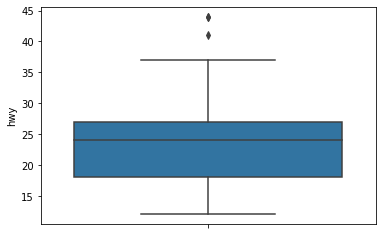

In [19]:
import seaborn as sns
sns.boxplot(data = mpg,y = 'hwy')

# 극단적인 값

In [20]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [21]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [22]:
# IQR구하기
# iqr pct75 - pct25
iqr = pct75 - pct25
iqr

9.0

In [23]:
# 하한선,상한선 구하기
# 하한선 pct25 - 1.5 * iqr
pct25 - 1.5 * iqr

4.5

In [25]:
# 상한선 pct75 + 1.5 * iqr
pct75 + 1.5 * iqr

40.5

In [29]:
# 극단치를 NaN 할달(결측으로) 처리하기
# 4.5 ~ 40.5 벗어나면 NaN부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),np.nan,mpg['hwy'])

# NaN 빈도 확인
mpg['hwy'].isna().sum()

3

In [32]:
# hwy NaN제거
# drv 분류
# hwy 평균 구하기

mpg.dropna(subset = ['hwy') \
.groupby('drv') \
.agg(mean_hwy = ('hwy','mean'))

TypeError: Index(...) must be called with a collection of some kind, 'hwy' was passed

# 정리
```

## 1. 결측치 정제하기
pd.isna(df).sub()       # 결측치 확인
df_nomiss = df.dropna(subset = ['score']) # 결측치 제거
df_nomiss = df.dropna(subset = ['score','sex']) # 여러 변수 동시에 결측치 제거

## 2. 이상치 저제하기
# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex] = np.where(df['sex] == 3,np.nan,df['sex)

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25) # 1사분위수
pct75 = mpg['hwy'].quantile(.75) # 3사분위수
iqr = pct75 - pct25 # IQR
pct25 - 1.5 * iqr   # 하한
pct75 + 1.5 * iqr   # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),np.nan,mpg['hwy'])
```